In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
Airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df = Airlines.drop(['ID#'],axis=1)

In [5]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [7]:
trans = StandardScaler()
airlines = trans.fit_transform(Airlines)
airlines

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [8]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(airlines)

DBSCAN(eps=0.475)

In [9]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [10]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [11]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,4
3995,-1
3996,-1
3997,0


In [12]:
df1 = pd.concat([df,cl],axis=1)  
df1 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

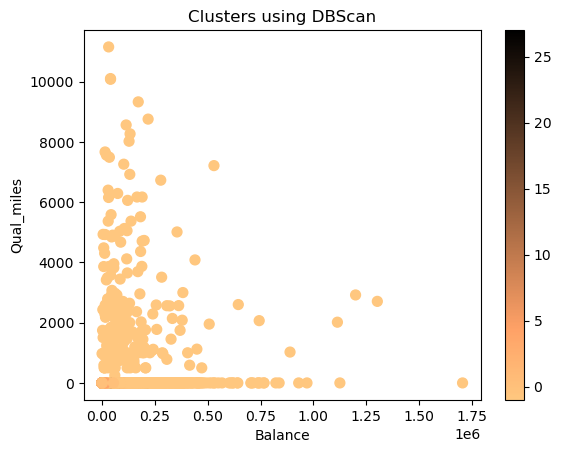

In [13]:
 df1.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')

In [14]:
dl = dbscan.labels_  

In [15]:
import sklearn
sklearn.metrics.silhouette_score(airlines, dl) 

-0.32966370260741557

In [16]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(airlines) 

In [17]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,1
1,1
2,1
3,1
4,2
...,...
3994,1
3995,1
3996,1
3997,1


In [19]:
pd.set_option("display.max_rows", None)

In [20]:
df2 = pd.concat([df1,cl1],axis=1) 
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,Kcluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,2
5,16420,0,1,1,1,0,0,0,0,6942,0,0,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,-1,2
7,20856,0,1,1,1,5250,4,250,1,6938,1,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1,2


Text(0.5, 1.0, 'Clusters using KMeans')

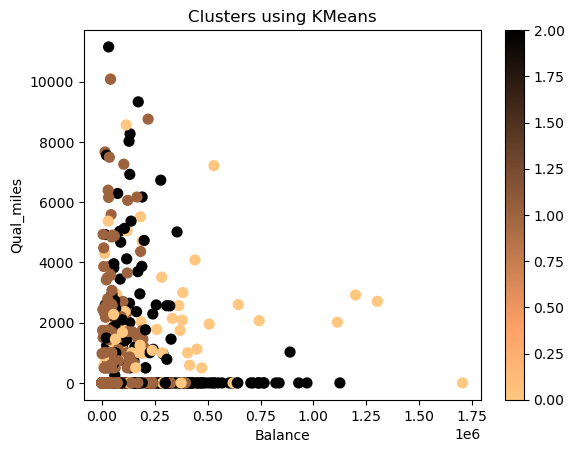

In [21]:
df2.plot(x="Balance",y ="Qual_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')

In [22]:
sklearn.metrics.silhouette_score(airlines, y_kmeans)

0.2810350238145607

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(airlines)
distances, indices = nbrs.kneighbors(airlines)

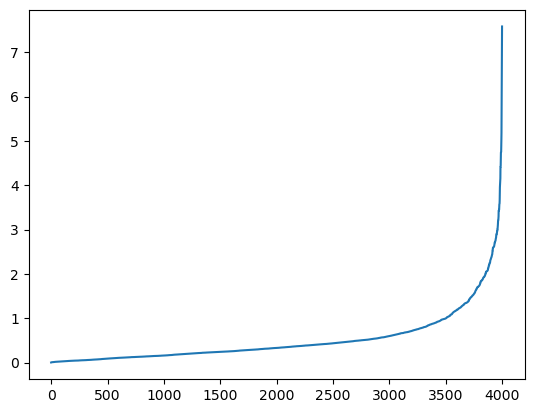

In [25]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 